In [231]:
from datetime import date
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("../Resources/btcjoin.csv", parse_dates=['date'])
df = df.drop(columns=['volume','change', 'low', 'high', 'open'])
df = df.rename(columns={"value": "wallets"})
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype("float")
df['priceL'] = np.log(df['price'])
df
#https://dcresearch.medium.com/metcalfes-law-and-bitcoin-s-value-2b99c7efd1fa

,date,price,wallets,address,mined,priceL
0,2010-09-25,0.1,2,656.0,4109450.00,-2.302585
1,2010-09-26,0.1,2,444.0,4110750.00,-2.302585
2,2010-09-27,0.1,2,1070.0,4132150.00,-2.302585
3,2010-09-28,0.1,2,1503.0,4133200.00,-2.302585
4,2010-09-29,0.1,2,1049.0,4148050.00,-2.302585
...,...,...,...,...,...,...
4381,2022-10-21,19162.6,84879615,924681.0,19185681.25,9.860716
4382,2022-10-22,19204.8,84888147,830404.0,19186618.75,9.862916
4383,2022-10-23,19571.2,84893809,804140.0,19187600.00,9.881814
4384,2022-10-24,19331.5,84902680,919344.0,19188556.25,9.869491


In [232]:
df_train = df[['date', 'priceL']]
df_train = df_train.rename(columns = {"date":"ds", "priceL":"y"})

m = Prophet()
m.fit(df_train)

n_years =2
period = n_years * 365
future = m.make_future_dataframe(periods = period)
forecast = m.predict(future)

13:03:04 - cmdstanpy - INFO - Chain [1] start processing
13:03:07 - cmdstanpy - INFO - Chain [1] done processing


In [233]:
forecast[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5111,2024-10-20,11.697592,7.140447,16.104308
5112,2024-10-21,11.706575,7.219957,15.998022
5113,2024-10-22,11.717036,7.013685,16.024603
5114,2024-10-23,11.730414,7.173214,16.141620
5115,2024-10-24,11.738810,7.159111,16.196914


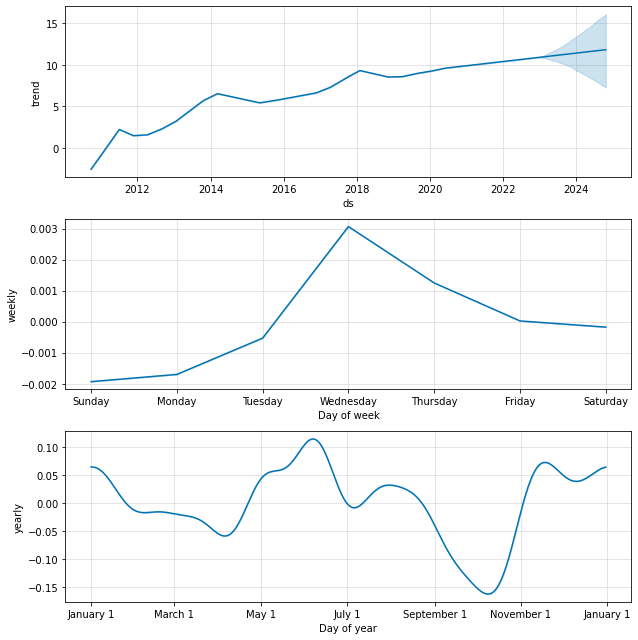

In [234]:
fig2 = m.plot_components(forecast)

In [235]:
df_train = df[['date', 'priceL']]
df_train = df_train.rename(columns = {"date":"ds", "priceL":"y"})

m = Prophet()
m.fit(df_train)

# instantiate the model and set parameters
model = Prophet()

# fit the model to historical data
model.fit(df_train);

13:03:09 - cmdstanpy - INFO - Chain [1] start processing
13:03:11 - cmdstanpy - INFO - Chain [1] done processing
13:03:12 - cmdstanpy - INFO - Chain [1] start processing
13:03:15 - cmdstanpy - INFO - Chain [1] done processing


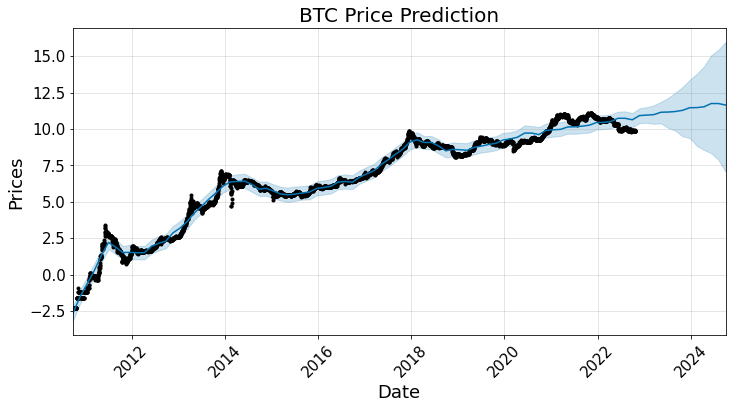

In [236]:
# Create a data frame that lists dates from Oct - Dec 2017
insample = pd.DataFrame(pd.date_range("2010-09-25", "2024-10-01", periods=92))

# Change the column name
insample.columns = ['ds']

# in-sample prediction
prediction = model.predict(insample)

# Plot
fig = model.plot(prediction, figsize=(10,5))
ax = fig.gca()
ax.set_title("BTC Price Prediction", size=20)
ax.set_xlabel("Date", size=18)
ax.set_ylabel("Prices", size=18)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', rotation=45, labelsize=15)
ax.set_xlim(pd.to_datetime(['2010-09-25', '2024-10-01'])) 
plt.show();
# plt.savefig("../static/prices.png")

In [276]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(name="Actual", x=df_train['ds'], y=df_train['y'], legendrank=4))
fig.add_trace(go.Scatter(name="Middle Bound Prediction", x=prediction['ds'], y=prediction['yhat'], legendrank=2))
fig.add_trace(go.Scatter(name="Lower Bound Prediction", x=prediction['ds'], y=prediction['yhat_lower'], legendrank=1))
fig.add_trace(go.Scatter(name="Upper Bound Prediction", x=prediction['ds'], y=prediction['yhat_upper'], legendrank=1))

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)

fig.update_yaxes(fixedrange=False)
fig.update_layout(title_text='Bitcoin Prices and Date Prediction')
fig.update_yaxes(ticklabelposition="inside top", title="Bitcoin Prices")
fig.update_xaxes(ticklabelposition="inside top", title="Date")
fig.update_yaxes(nticks=15)
fig.update_xaxes(nticks=20)
fig.update_layout(
    margin=dict(l=20, r=100, t=70, b=20),
)
fig.show()
fig.write_html('../static/logprices.html')

In [238]:
df_trainp = df[['date', 'price']]
df_trainp = df_trainp.rename(columns = {"date":"ds", "price":"y"})

m = Prophet()
m.fit(df_trainp)

n_years =2
period = n_years * 365
future = m.make_future_dataframe(periods = period)
forecastp = m.predict(future)

13:03:16 - cmdstanpy - INFO - Chain [1] start processing
13:03:16 - cmdstanpy - INFO - Chain [1] done processing


In [239]:
df_trainp

,ds,y
0,2010-09-25,0.1
1,2010-09-26,0.1
2,2010-09-27,0.1
3,2010-09-28,0.1
4,2010-09-29,0.1
...,...,...
4381,2022-10-21,19162.6
4382,2022-10-22,19204.8
4383,2022-10-23,19571.2
4384,2022-10-24,19331.5


In [240]:
forecastp[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5111,2024-10-20,67579.622795,57752.643750,76911.692443
5112,2024-10-21,67786.517389,57814.471968,77606.833243
5113,2024-10-22,67956.169026,58512.925390,78135.350597
5114,2024-10-23,68193.892712,58553.954370,78893.706680
5115,2024-10-24,68339.782496,58176.961599,77819.822219


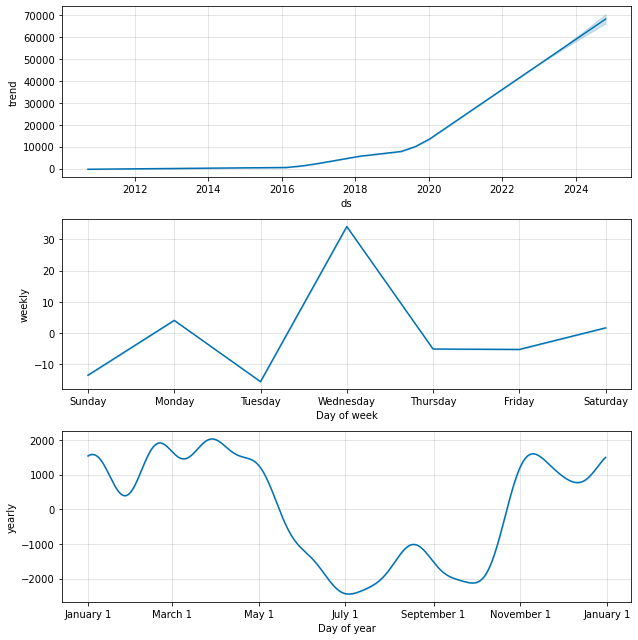

In [241]:
fig2 = m.plot_components(forecastp)

In [242]:
forecastp

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-25,-270.670056,-11737.332890,6348.289695,-270.670056,-270.670056,-2107.132373,-2107.132373,-2107.132373,1.606006,1.606006,1.606006,-2108.738379,-2108.738379,-2108.738379,0.0,0.0,0.0,-2377.802429
1,2010-09-26,-270.285777,-11184.390260,6717.082280,-270.285777,-270.285777,-2130.738529,-2130.738529,-2130.738529,-13.596887,-13.596887,-13.596887,-2117.141641,-2117.141641,-2117.141641,0.0,0.0,0.0,-2401.024306
2,2010-09-27,-269.901499,-11853.826860,7207.272608,-269.901499,-269.901499,-2119.736090,-2119.736090,-2119.736090,4.009957,4.009957,4.009957,-2123.746046,-2123.746046,-2123.746046,0.0,0.0,0.0,-2389.637588
3,2010-09-28,-269.517220,-12007.583884,6594.453732,-269.517220,-269.517220,-2143.611221,-2143.611221,-2143.611221,-15.651441,-15.651441,-15.651441,-2127.959780,-2127.959780,-2127.959780,0.0,0.0,0.0,-2413.128441
4,2010-09-29,-269.132941,-11612.671021,6777.432054,-269.132941,-269.132941,-2094.986743,-2094.986743,-2094.986743,34.127492,34.127492,34.127492,-2129.114235,-2129.114235,-2129.114235,0.0,0.0,0.0,-2364.119684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,2024-10-20,67967.629769,57752.643750,76911.692443,65950.911550,70186.207415,-388.006973,-388.006973,-388.006973,-13.596887,-13.596887,-13.596887,-374.410086,-374.410086,-374.410086,0.0,0.0,0.0,67579.622795
5112,2024-10-21,67998.851875,57814.471968,77606.833243,65975.606937,70220.966638,-212.334486,-212.334486,-212.334486,4.009957,4.009957,4.009957,-216.344443,-216.344443,-216.344443,0.0,0.0,0.0,67786.517389
5113,2024-10-22,68030.073982,58512.925390,78135.350597,66001.779910,70255.725862,-73.904956,-73.904956,-73.904956,-15.651441,-15.651441,-15.651441,-58.253515,-58.253515,-58.253515,0.0,0.0,0.0,67956.169026
5114,2024-10-23,68061.296088,58553.954370,78893.706680,66028.615224,70290.485085,132.596623,132.596623,132.596623,34.127492,34.127492,34.127492,98.469131,98.469131,98.469131,0.0,0.0,0.0,68193.892712


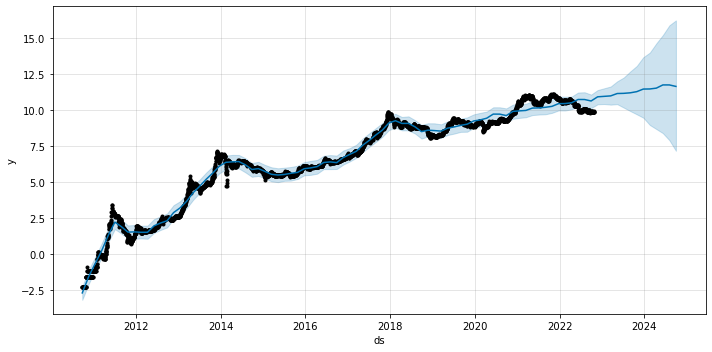

In [229]:
# Create a data frame that lists dates from Oct - Dec 2017
insamplep = pd.DataFrame(pd.date_range("2010-09-25", "2024-10-01", periods=92))

# Change the column name
insamplep.columns = ['ds']

# in-sample prediction
predictionp = modelp.predict(insamplep)

# Plot
figp = modelp.plot(predictionp, figsize=(10,5))
ax = fig2.gca()
ax.set_title("BTC Price Prediction", size=20)
ax.set_xlabel("Date", size=18)
ax.set_ylabel("Prices", size=18)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', rotation=45, labelsize=15)
ax.set_xlim(pd.to_datetime(['2010-09-25', '2024-10-01'])) 
plt.show();

In [280]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(name="Log Actual", yaxis='y', x=df_train['ds'], y=df_train['y'], legendrank=4))
fig.add_trace(go.Scatter(name="Log Forecast",yaxis="y", x=forecast['ds'], y=forecast['yhat_upper'], legendrank=1))
fig.add_trace(go.Scatter(x=df_trainp['ds'], y=df_trainp['y'], name="Linear Actual", yaxis="y2"))
fig.add_trace(go.Scatter(name="Linear Forecast",yaxis="y2", x=forecastp['ds'], y=forecastp['yhat_upper'], legendrank=1))

# Create axis objects
fig.update_layout(xaxis=dict(domain=[0.1, .9]),
	#create 1st y axis			
	yaxis=dict(
		title="Logarithmic",
		titlefont=dict(color="#1f77b4"),
		tickfont=dict(color="#1f77b4")),
				
	#create 2nd y axis	
	yaxis2=dict(title="Linear",overlaying="y",
				side="left",position=1))

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.5
))

# title
fig.update_layout(
	title_text="Geeksforgeeks - Three y-axes",
	width=800,
)

fig.update_yaxes(fixedrange=False)
fig.update_layout(title_text='Bitcoin Prices and Date Prediction')
fig.update_yaxes(ticklabelposition="inside top", title="Bitcoin Prices")
fig.update_xaxes(ticklabelposition="inside top", title="Date")
fig.update_yaxes(nticks=15)
fig.update_xaxes(nticks=20)
fig.update_layout(
    margin=dict(l=10, r=100, t=50, b=20),
)

fig.show()


In [244]:
#https://www.kaggle.com/code/manovirat/timeseries-using-prophet-hyperparameter-tuning
# hyperparameter-tuning

In [245]:
metric_df = forecast.set_index('ds')[['yhat']].join(df_train.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [246]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(r2_score(metric_df.y, metric_df.yhat))
print(mean_squared_error(metric_df.y, metric_df.yhat))
print(mean_absolute_error(metric_df.y, metric_df.yhat))

0.9866223684767609
0.13905698624678187
0.280933703757847
